# Notebook for Analysis of AlphaFold Results

In [10]:
# Import libraries
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt

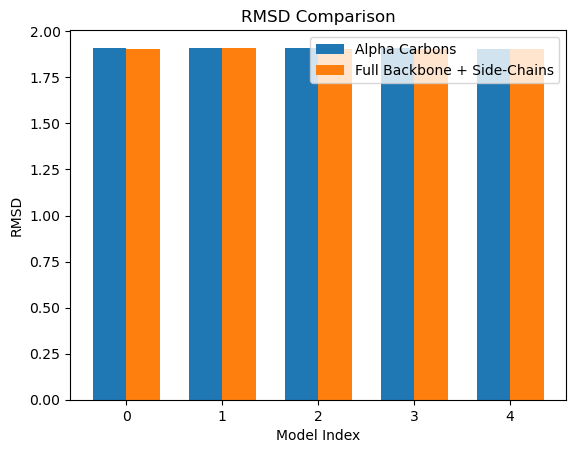

In [11]:
# Plot RMSD
# Create empty lists to store RMSD values
rmsd_alpha_carbons = []
rmsd_full_backbone = []

# Load the crystal structure
crystal_traj = md.load('/home/tje3676/comp-lab-class/comp-lab-class/Week7/Inputs/3ry2.pdb')
backbone_selection = crystal_traj.top.select('backbone')

# Iterator
for i in range(5):

    # Load prediction
    prediction_file = f'/home/tje3676/comp-lab-class/comp-lab-class/Week7/Inputs/rcsb_pdb_3RY2/ranked_{i}.pdb'
    prediction_traj = md.load(prediction_file)

    # Align the prediction to the crystal structure
    prediction_traj.superpose(crystal_traj, atom_indices=prediction_traj.top.select('name CA'))

    # Calculate RMSD for alpha-carbons and full backbone and side-chains
    rmsd_ca = md.rmsd(prediction_traj, crystal_traj, atom_indices=prediction_traj.top.select('name CA'))
    rmsd_bb_sc = md.rmsd(prediction_traj, crystal_traj, atom_indices=backbone_selection)

    # Append the RMSD values to the lists
    rmsd_alpha_carbons.append(rmsd_ca.mean())
    rmsd_full_backbone.append(rmsd_bb_sc.mean())

# Create a bar plot
x = np.arange(5)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rmsd_alpha_carbons, width, label='Alpha Carbons')
rects2 = ax.bar(x + width/2, rmsd_full_backbone, width, label='Full Backbone + Side-Chains')

ax.set_xlabel('Model Index')
ax.set_ylabel('RMSD')
ax.set_title('RMSD Comparison')
ax.set_xticks(x)
ax.legend()

plt.show()